# PFM: Cleaning Data SNP

## **1. Importar librerías y datos**


In [120]:
# Importamos las librerías
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import pytz
import seaborn as sns

# Cargamos el conjunto de datos de entrada
df1 = pd.read_csv('df_Tenerife_Electricity_19_01.csv', delimiter=';', encoding='latin-1')
df2 = pd.read_csv('df_Tenerife_Electricity_19_02.csv', delimiter=';', encoding='latin-1')
df3 = pd.read_csv('df_Tenerife_Electricity_19_03.csv', delimiter=';', encoding='latin-1')
df4 = pd.read_csv('df_Tenerife_Electricity_19_04.csv', delimiter=';', encoding='latin-1')
df5 = pd.read_csv('df_Tenerife_Electricity_19_05.csv', delimiter=';', encoding='latin-1')
df6 = pd.read_csv('df_Tenerife_Electricity_19_06.csv', delimiter=';', encoding='latin-1')
df7 = pd.read_csv('df_Tenerife_Electricity_19_07.csv', delimiter=';', encoding='latin-1')
df8 = pd.read_csv('df_Tenerife_Electricity_19_08.csv', delimiter=';', encoding='latin-1')
df9 = pd.read_csv('df_Tenerife_Electricity_19_09.csv', delimiter=';', encoding='latin-1')
df10 = pd.read_csv('df_Tenerife_Electricity_19_10.csv', delimiter=';', encoding='latin-1')
df11 = pd.read_csv('df_Tenerife_Electricity_19_11.csv', delimiter=';', encoding='latin-1')
df12 = pd.read_csv('df_Tenerife_Electricity_19_12.csv', delimiter=';', encoding='latin-1')


dataset = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

## **2. Comprender y limpiar los datos**

Es necesario visualizar y comprender los datos con los que vamos a trabajar, así como conocer sus características. El Data Cleaning consiste en identificar y eliminar las irregularidades.

Las irregularidades se pueden clasificar en:
- Missing values
- Incorrect format
- Incorrect headers
-  Anomalies/Outliers

**1. ¿Cuántos datos hay?** **¿Cuántos atributos hay en los datos?**

In [121]:
# Filasxcolumnas de los datos
dataset.shape


(52560, 17)

In [122]:
# Dataset v0 por pantalla
dataset

,time_series,ini,Generación T.Real no renovable SNP,Generación T.Real renovable SNP,Demanda real suma de generación SNP,Generación T.Real hidráulica SNP,Generación T.Real solar fotovoltaica SNP,Generación T.Real turbina de vapor SNP,Generación T.Real ciclo combinado SNP,Generación T.Real eólica SNP,Generación T.Real turbina de gas SNP,Generación T.Real motores diésel SNP,Demanda prevista SNP,Demanda programada SNP,Demanda Real SNP,Precio medio de la generación en los SNP por subsistema,Precio medio de la demanda en los SNP por subsistema
0,2019-01-01 00:00:00+01:00,NaN,347.6,0.0,347.6,0.0,0.0,173.2,159.0,0.0,0.0,15.4,351.0,343.4,348.3,156.18,67.33
1,2019-01-01 00:10:00+01:00,NaN,345.0,0.0,345.0,0.0,0.0,176.2,152.8,0.0,0.0,16.0,348.1,343.4,345.0,NaN,NaN
2,2019-01-01 00:20:00+01:00,NaN,346.9,0.1,347.0,0.0,0.0,174.9,155.9,0.1,0.0,16.1,345.5,343.4,347.7,NaN,NaN
3,2019-01-01 00:30:00+01:00,NaN,344.5,0.2,344.7,0.0,0.0,173.8,155.4,0.2,0.0,15.3,343.0,343.4,343.9,NaN,NaN
4,2019-01-01 00:40:00+01:00,NaN,342.9,0.1,343.0,0.0,0.0,175.8,151.6,0.1,0.0,15.5,340.8,343.4,343.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2019-12-31 23:10:00+01:00,NaN,371.4,2.3,373.7,0.0,0.0,95.4,245.1,2.3,0.0,30.9,380.3,370.1,374.7,NaN,NaN
52556,2019-12-31 23:20:00+01:00,NaN,368.0,2.4,370.4,0.0,0.0,85.5,251.7,2.4,0.0,30.8,374.6,370.1,370.9,NaN,NaN
52557,2019-12-31 23:30:00+01:00,NaN,362.6,2.7,365.3,0.0,0.0,79.9,251.6,2.7,0.0,31.1,369.4,370.1,366.9,NaN,NaN
52558,2019-12-31 23:40:00+01:00,NaN,355.2,5.0,360.2,0.0,0.0,75.9,248.6,5.0,0.0,30.7,364.6,370.1,360.6,NaN,NaN


**2. ¿Qué significan los datos?** 

In [123]:
# Formato de los datos
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 17 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   time_series                                              52560 non-null  object 
 1   ini                                                      0 non-null      float64
 2   Generación T.Real no renovable SNP                       52452 non-null  float64
 3   Generación T.Real renovable SNP                          52452 non-null  float64
 4   Demanda real suma de generación SNP                      52452 non-null  float64
 5   Generación T.Real hidráulica SNP                         52452 non-null  float64
 6   Generación T.Real solar fotovoltaica SNP                 52452 non-null  float64
 7   Generación T.Real turbina de vapor SNP                   52452 non-null  float64
 8   Generación T.Real ciclo co

In [124]:
# Resumen estadístico del conjunto de datos de entrada
dataset.describe()

,ini,Generación T.Real no renovable SNP,Generación T.Real renovable SNP,Demanda real suma de generación SNP,Generación T.Real hidráulica SNP,Generación T.Real solar fotovoltaica SNP,Generación T.Real turbina de vapor SNP,Generación T.Real ciclo combinado SNP,Generación T.Real eólica SNP,Generación T.Real turbina de gas SNP,Generación T.Real motores diésel SNP,Demanda prevista SNP,Demanda programada SNP,Demanda Real SNP,Precio medio de la generación en los SNP por subsistema,Precio medio de la demanda en los SNP por subsistema
count,0.0,52452.000000,52452.000000,52452.000000,52452.0,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52560.000000,52560.000000,52452.000000,8760.000000,8760.000000
mean,NaN,330.677063,78.481057,409.158114,0.0,21.637854,123.580016,173.618590,56.843203,11.986193,21.492269,409.655592,409.635148,409.210085,147.892823,53.087953
std,NaN,82.308351,67.897543,79.538800,0.0,29.834941,45.502301,52.756052,53.269599,17.728651,13.786134,79.236014,78.788295,79.543610,24.760690,12.705926
min,NaN,0.000000,0.000000,0.000000,0.0,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.300000,262.900000,0.000000,92.190000,5.170000
25%,NaN,273.500000,16.375000,329.175000,0.0,0.000000,93.000000,143.500000,6.400000,0.000000,14.700000,329.500000,330.500000,329.100000,134.307500,43.740000
50%,NaN,324.700000,64.400000,431.400000,0.0,0.000000,122.900000,163.300000,41.100000,0.000000,18.800000,432.500000,432.350000,431.500000,147.700000,53.795000
75%,NaN,393.600000,127.500000,477.100000,0.0,43.600000,162.100000,202.400000,101.700000,20.800000,34.900000,477.900000,478.200000,477.100000,160.830000,62.020000
max,NaN,550.900000,265.600000,572.500000,0.0,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,577.000000,570.900000,572.800000,1583.000000,114.420000


In [125]:
print('El Dataset tiene' , dataset.shape[0], 'filas')
print('El Dataset tiene'  , dataset.shape[1], 'columnas')

El Dataset tiene 52560 filas
El Dataset tiene 17 columnas


**3. ¿Son todas las columnas relevantes?** 

In [126]:
# Eliminamos las columnas que no aportan ninguna información extra
dataset = dataset.drop(['ini','Generación T.Real hidráulica SNP','Demanda prevista SNP','Demanda Real SNP','Precio medio de la demanda en los SNP por subsistema'],axis=1)

# Resumen estadístico dataset v1
dataset.describe()

,Generación T.Real no renovable SNP,Generación T.Real renovable SNP,Demanda real suma de generación SNP,Generación T.Real solar fotovoltaica SNP,Generación T.Real turbina de vapor SNP,Generación T.Real ciclo combinado SNP,Generación T.Real eólica SNP,Generación T.Real turbina de gas SNP,Generación T.Real motores diésel SNP,Demanda programada SNP,Precio medio de la generación en los SNP por subsistema
count,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52452.000000,52560.000000,8760.000000
mean,330.677063,78.481057,409.158114,21.637854,123.580016,173.618590,56.843203,11.986193,21.492269,409.635148,147.892823
std,82.308351,67.897543,79.538800,29.834941,45.502301,52.756052,53.269599,17.728651,13.786134,78.788295,24.760690
min,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.900000,92.190000
25%,273.500000,16.375000,329.175000,0.000000,93.000000,143.500000,6.400000,0.000000,14.700000,330.500000,134.307500
50%,324.700000,64.400000,431.400000,0.000000,122.900000,163.300000,41.100000,0.000000,18.800000,432.350000,147.700000
75%,393.600000,127.500000,477.100000,43.600000,162.100000,202.400000,101.700000,20.800000,34.900000,478.200000,160.830000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,570.900000,1583.000000


No se ha conseguido saber la generación hidráulica en tenerife para el año 2019, lo único que sabemos es que actualmente sólo existe una instalación en funcionamiento: la central hidroeléctrica de la Vergara - La Guancha con una potencia instalada neta de 387,1 kW. Lo que si se ha obtenido del informe anual de REE para el 2019, es la generación hidráulica anual en el conjunto de las islas Canarias (Centrales minihidráulicas Tenerife 387,1 kW +Las Palmas 800 kW) que fué de 3,509 GWh correspondiente al 0,1% de la generación de energía total de la isla de Tenerife.

In [127]:
# Dataset v1 por pantalla
dataset

,time_series,Generación T.Real no renovable SNP,Generación T.Real renovable SNP,Demanda real suma de generación SNP,Generación T.Real solar fotovoltaica SNP,Generación T.Real turbina de vapor SNP,Generación T.Real ciclo combinado SNP,Generación T.Real eólica SNP,Generación T.Real turbina de gas SNP,Generación T.Real motores diésel SNP,Demanda programada SNP,Precio medio de la generación en los SNP por subsistema
0,2019-01-01 00:00:00+01:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,156.18
1,2019-01-01 00:10:00+01:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,NaN
2,2019-01-01 00:20:00+01:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,NaN
3,2019-01-01 00:30:00+01:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,NaN
4,2019-01-01 00:40:00+01:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
52555,2019-12-31 23:10:00+01:00,371.4,2.3,373.7,0.0,95.4,245.1,2.3,0.0,30.9,370.1,NaN
52556,2019-12-31 23:20:00+01:00,368.0,2.4,370.4,0.0,85.5,251.7,2.4,0.0,30.8,370.1,NaN
52557,2019-12-31 23:30:00+01:00,362.6,2.7,365.3,0.0,79.9,251.6,2.7,0.0,31.1,370.1,NaN
52558,2019-12-31 23:40:00+01:00,355.2,5.0,360.2,0.0,75.9,248.6,5.0,0.0,30.7,370.1,NaN


**4. ¿El formato de los datos es correcto?** 

In [128]:
# Transformamos time_series a formato de fecha y hora con .to_datetime()
dataset['time_series'] = pd.to_datetime(dataset['time_series'], format='%Y-%m-%d %H:%M:%S', utc=True)
# Eliminamos la zona horaria
dataset['time_series'] = dataset['time_series'].dt.tz_convert(tz='Europe/Madrid')
dataset['time_series'] = dataset['time_series'].dt.tz_localize(None)
# Convertimos en el index a la fecha y hora 'time_series'
dataset = dataset.set_index('time_series')

# 5 primeras filas del dataset
dataset.head(5)

,Generación T.Real no renovable SNP,Generación T.Real renovable SNP,Demanda real suma de generación SNP,Generación T.Real solar fotovoltaica SNP,Generación T.Real turbina de vapor SNP,Generación T.Real ciclo combinado SNP,Generación T.Real eólica SNP,Generación T.Real turbina de gas SNP,Generación T.Real motores diésel SNP,Demanda programada SNP,Precio medio de la generación en los SNP por subsistema
time_series,,,,,,,,,,,
2019-01-01 00:00:00,347.6,0.0,347.6,0.0,173.2,159.0,0.0,0.0,15.4,343.4,156.18
2019-01-01 00:10:00,345.0,0.0,345.0,0.0,176.2,152.8,0.0,0.0,16.0,343.4,NaN
2019-01-01 00:20:00,346.9,0.1,347.0,0.0,174.9,155.9,0.1,0.0,16.1,343.4,NaN
2019-01-01 00:30:00,344.5,0.2,344.7,0.0,173.8,155.4,0.2,0.0,15.3,343.4,NaN
2019-01-01 00:40:00,342.9,0.1,343.0,0.0,175.8,151.6,0.1,0.0,15.5,343.4,NaN


In [129]:
# Tipo de datos
dataset.dtypes

Generación T.Real no renovable SNP                         float64
Generación T.Real renovable SNP                            float64
Demanda real suma de generación SNP                        float64
Generación T.Real solar fotovoltaica SNP                   float64
Generación T.Real turbina de vapor SNP                     float64
Generación T.Real ciclo combinado SNP                      float64
Generación T.Real eólica SNP                               float64
Generación T.Real turbina de gas SNP                       float64
Generación T.Real motores diésel SNP                       float64
Demanda programada SNP                                     float64
Precio medio de la generación en los SNP por subsistema    float64
dtype: object

Todos los atributos son variables continuas (números reales). Esto se tiene que tomar en consideración para la elección y creación del modelo de aprendizaje.

**5. ¿Los títulos de las columnas son representativos?** 

In [114]:
# Cambiamos el título de los atributos a nombres más cortos, sin espacios y sin acentos. 
# Respetamos la misma anotación para todos ellos.
dataset.columns = ['Generacion_no_renovable_MW','Generacion_renovable_MW','Demanda_real_MW','Generacion_FV_MW','Generacion_TV_MW','Generacion_CC_MW','Generacion_EO_MW','Generacion_TG_MW','Generacion_MD_MW','Demanda_programada_MW','Precio_generacion_€MWh']

In [115]:
# Creamos un diccionario con la descripción de cada indicador o atributo.
leyenda={dataset.columns[0]:'Generación en MW medida en tiempo real del tipo de producción no renovable en la isla de Tenerife',
        dataset.columns[1]:'Generación en MW medida en tiempo real del tipo de producción renovable en la isla de Tenerife',
        dataset.columns[2]:'Es el sumatorio de la medida en MW en tiempo real para los distintos tipos de producción en la isla de Tenerife',
        dataset.columns[3]:'Generación medida en MW en tiempo real del tipo de producción solar fotovoltaica en la isla de Tenerife',
        dataset.columns[4]:'Generación medida en MW en tiempo real del tipo de producción turbina de vapor en la isla de Tenerife',
        dataset.columns[5]:'Generación medida en MW en tiempo real del tipo de producción ciclo combinado en la isla de Tenerife',
        dataset.columns[6]:'Generación medida en MW en tiempo real del tipo de producción eólica en la isla de Tenerife',
        dataset.columns[7]:'Generación medida en MW en tiempo real del tipo de producción turbina de gas en la isla de Tenerife',
        dataset.columns[8]:'Generación medida en MW en tiempo real del tipo de producción motor diésel en la isla de Tenerife',
        dataset.columns[9]:'Es la demanda de energía programada en MW en la isla de Tenerife calculada con los programas de los grupos de generación a los que se les haya asignado suministro.',
        dataset.columns[10]:'Precio medio ponderado en €/MWh de la generación de energía en la isla de Tenerife'}

# Diccionario por pantalla
leyenda

{'Generacion_no_renovable_MW': 'Generación en MW medida en tiempo real del tipo de producción no renovable en la isla de Tenerife',
 'Generacion_renovable_MW': 'Generación en MW medida en tiempo real del tipo de producción renovable en la isla de Tenerife',
 'Demanda_real_MW': 'Es el sumatorio de la medida en MW en tiempo real para los distintos tipos de producción en la isla de Tenerife',
 'Generacion_FV_MW': 'Generación medida en MW en tiempo real del tipo de producción solar fotovoltaica en la isla de Tenerife',
 'Generacion_TV_MW': 'Generación medida en MW en tiempo real del tipo de producción turbina de vapor en la isla de Tenerife',
 'Generacion_CC_MW': 'Generación medida en MW en tiempo real del tipo de producción ciclo combinado en la isla de Tenerife',
 'Generacion_EO_MW': 'Generación medida en MW en tiempo real del tipo de producción eólica en la isla de Tenerife',
 'Generacion_TG_MW': 'Generación medida en MW en tiempo real del tipo de producción turbina de gas en la isla de

**6. ¿Falta algún dato? 
De ser así, indica cuántos y en que atributo(s)** 


In [116]:
# Comprobamos si falta algún dato y en qué atributo
dataset.isna().sum()


Generacion_no_renovable_MW      108
Generacion_renovable_MW         108
Demanda_real_MW                 108
Generacion_FV_MW                108
Generacion_TV_MW                108
Generacion_CC_MW                108
Generacion_EO_MW                108
Generacion_TG_MW                108
Generacion_MD_MW                108
Demanda_programada_MW             0
Precio_generacion_€MWh        43800
dtype: int64

In [117]:
# Localizamos los valores nulos de los indicadores telemedidos
dataset[dataset['Generacion_no_renovable_MW'].isna()]

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh
time_series,,,,,,,,,,,
2019-01-15 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.1,164.48
2019-01-15 02:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.1,NaN
2019-01-15 02:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.1,NaN
2019-01-15 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.1,NaN
2019-01-15 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,281.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2019-01-15 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.0,NaN
2019-01-15 19:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.0,NaN
2019-01-15 19:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,537.0,NaN


Se observa un gap entre las 2 y las 20 horas del 15 de enero de 2019 en el cual no hay registro de valores telemedidos, posiblemente debido a un fallo del sistema de monitorización y/o del sistema de comunicación.

In [118]:
# Rellenamos el valor del precio de generación y demanda de acuerdo al último valor existente
dataset = dataset.fillna(method='pad')

# Eliminamos la fila entera cuando no tenemos datos de generación medida a tiempo real
dataset = dataset.dropna(subset=dataset.columns[:10])

# Comprobamos si falta algún dato y en qué atributo
dataset.isna().sum()

Generacion_no_renovable_MW    0
Generacion_renovable_MW       0
Demanda_real_MW               0
Generacion_FV_MW              0
Generacion_TV_MW              0
Generacion_CC_MW              0
Generacion_EO_MW              0
Generacion_TG_MW              0
Generacion_MD_MW              0
Demanda_programada_MW         0
Precio_generacion_€MWh        0
dtype: int64

**7. ¿Existen outliers? De ser así, analizarlos y tratarlos** 

## **3. Visualizar los datos**

Una manera visual de entender los datos de entrada. 
1. Histograma
2. Curva de densidad
3. Boxplots
4. Matriz de correlación


**1. Gráfico de densidades**

Visualiza la distribución de los datos. Es una variable del histograma, pero elimina el ruido, por lo que son mejores para determinar la forma de distribución de un atributo. Lo spicos del gráfico de densidad ayudan a mostrar dónde los valores se concentran más. 

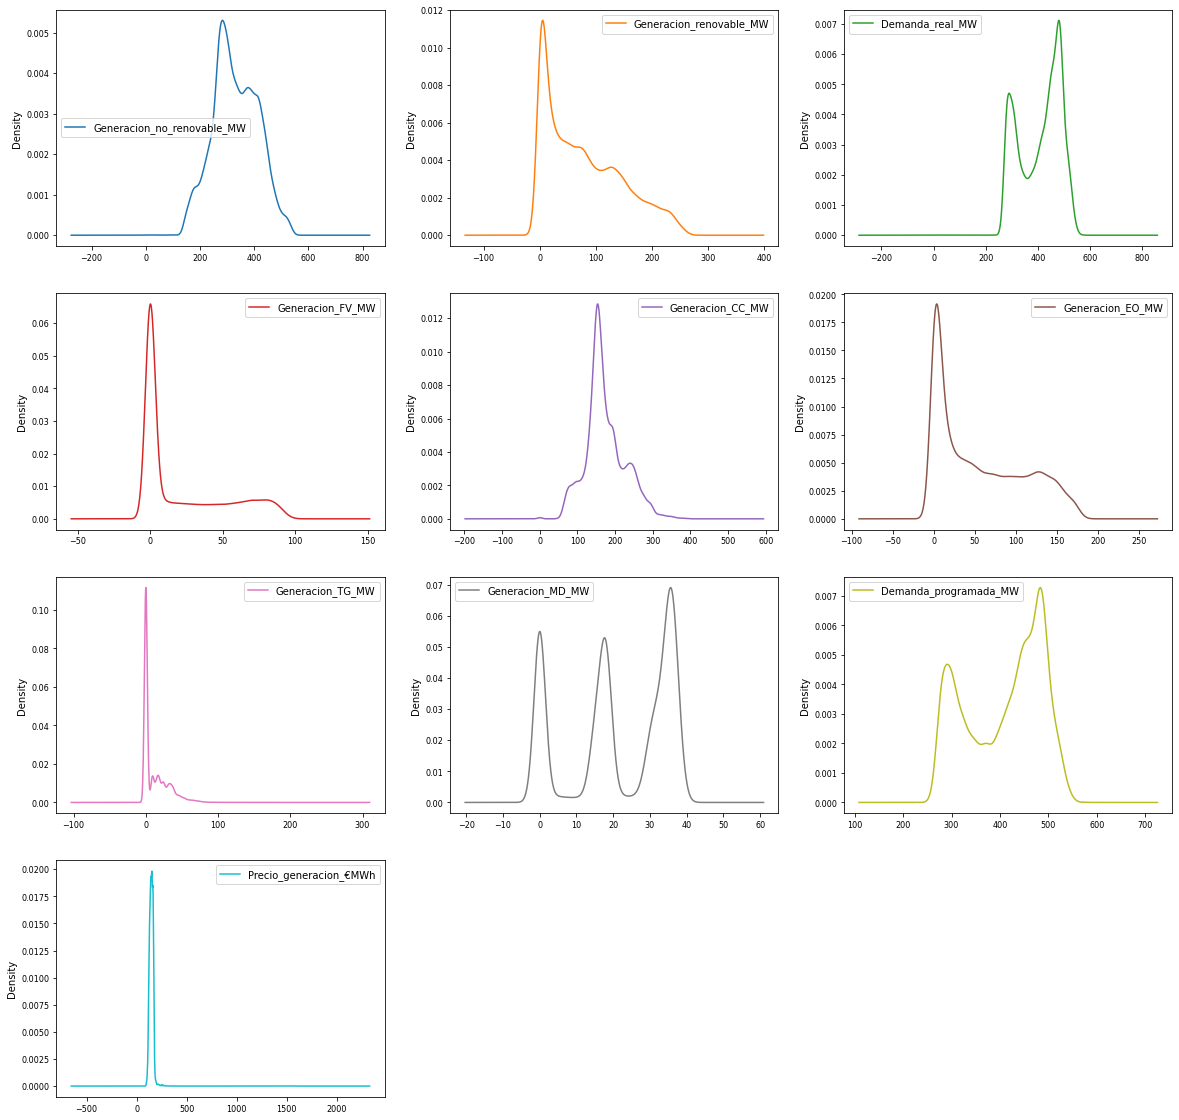

In [94]:
### Escribe aquí tu código ###
density = dataset.plot(kind='kde', x=4, subplots=True, legend=True , layout=(4, 3), figsize=(20, 20), sharex=False,
                        fontsize=8, stacked=True)

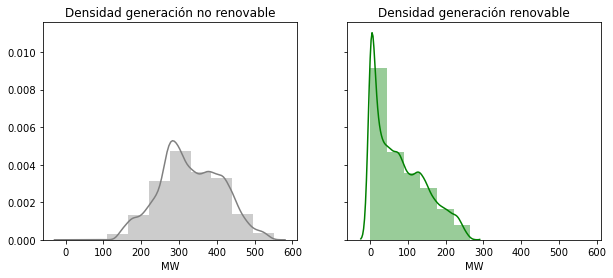

In [98]:
# Generación no renovable, Generación renovable
f, ax = plt.subplots(1,2,sharex=True, sharey=True, figsize=(10,4))
vis1 = sns.distplot(dataset["Generacion_no_renovable_MW"],bins=10, ax= ax[0], axlabel='MW', color='gray')
ax[0].set_title('Densidad generación no renovable')
vis2 = sns.distplot(dataset["Generacion_renovable_MW"],bins=6, ax=ax[1], axlabel='MW', color='green')
ax[1].set_title('Densidad generación renovable');

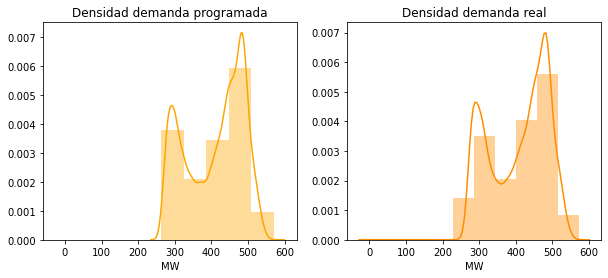

In [95]:
# Demanda programada, Demanda real
f, ax = plt.subplots(1,2,sharex=True, figsize=(10,4))
vis1 = sns.distplot(dataset["Demanda_programada_MW"],bins=5, ax=ax[0], axlabel='MW', color='orange')
ax[0].set_title('Densidad demanda programada')
vis2 = sns.distplot(dataset["Demanda_real_MW"],bins=10, ax=ax[1], axlabel='MW', color='darkorange')
ax[1].set_title('Densidad demanda real');

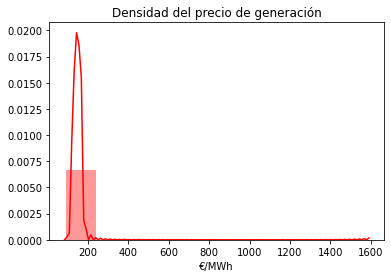

In [93]:
#Precio medio generación

ax=sns.distplot(dataset["Precio_generacion_€MWh"],hist=True, kde=True, color='red',axlabel='€/MWh',bins=10)

plt.title('Densidad del precio de generación');


**2. Boxplots** 

El boxplot (diagrama de caja) nos permite identificar los valores atípicos y comparar distribuciones. Además, se conoce como se distribuyen el 50% de los valores (dentro de la caja).

* **¿Qué atributo llama la atención por sus valores atípicos?**

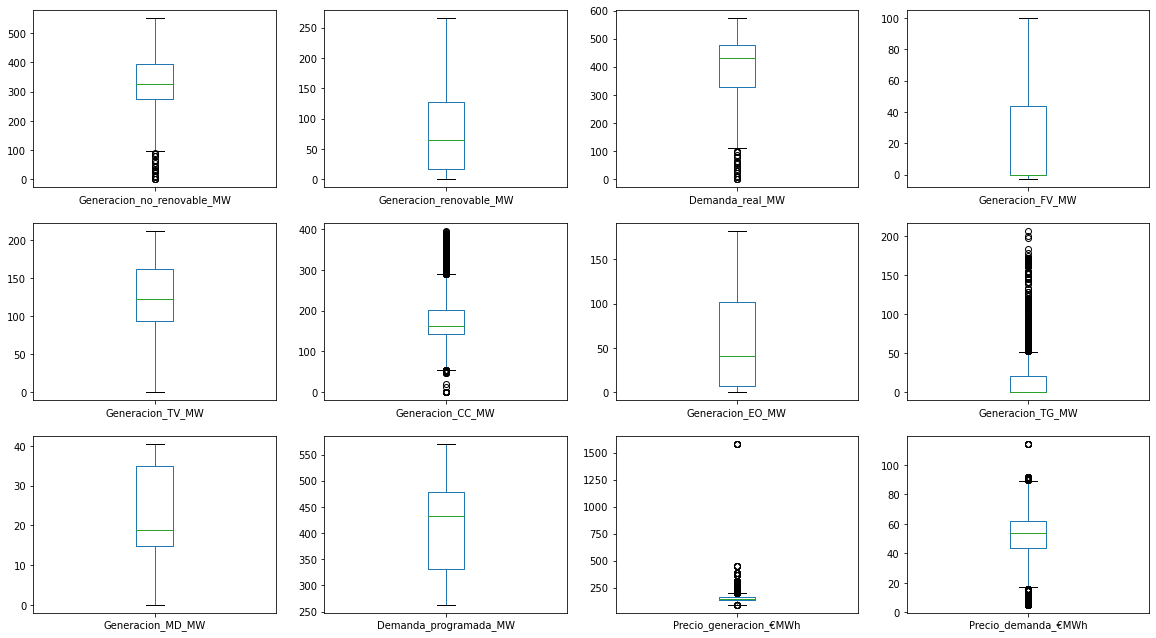

In [58]:
### Escribe aquí tu código ###
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 15), sharex=False,
                                 sharey=False, fontsize=10)

POSIBLES IRREGULARIDADES A ANALIZAR:

- ¿Outliers 'Demanda real suma de generación SNP' tienen sentido? ¿Ayudan o confunden al modelo? 
- Analizar también el atributo 'Generación T.Real no renovable SNP', los outlies coinciden en el time_series?


In [59]:
#Creamos una función para la detección de outliers con los cuantiles inferiores y superiores deseados

def groupby_outliers(df_in, col_name, qinf=0.25, qsup=0.75):
       q1 = df_in[col_name].quantile(qinf)
       q3 = df_in[col_name].quantile(qsup)
       iqr = q3-q1 #Interquartile range
       fence_low = q1-1.5*iqr
       fence_high = q3+1.5*iqr
       df_out = df_in.loc[(df_in[col_name] < fence_low) | (df_in[col_name] > fence_high)]
       return df_out

#Detectamos los outliers de 'demanda real suma de generación SNP' y los analizamos.

outliers1 = groupby_outliers(dataset, "Demanda_real_MW", 0.3, 0.7)
outliers1

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
time_series,,,,,,,,,,,,
2019-02-18 07:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,415.8,162.86,59.65
2019-03-13 09:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,476.4,131.24,58.27
2019-09-29 13:20:00,101.4,59.1,160.5,0.0,30.3,71.1,59.1,0.0,0.0,440.7,214.50,55.30
2019-09-29 13:30:00,101.4,59.1,160.5,0.0,30.3,71.1,59.1,0.0,0.0,440.7,214.50,55.30
2019-09-29 13:40:00,101.4,59.1,160.5,0.0,30.3,71.1,59.1,0.0,0.0,440.7,214.50,55.30
2019-09-29 13:50:00,101.4,9.2,110.6,0.0,30.3,71.1,9.2,0.0,0.0,440.7,214.50,55.30
2019-09-29 14:00:00,30.3,0.0,30.3,0.0,30.3,0.0,0.0,0.0,0.0,434.8,1583.00,55.11
2019-09-29 14:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,434.8,1583.00,55.11
2019-09-29 14:20:00,7.3,0.0,7.3,0.0,0.0,0.0,0.0,7.3,0.0,434.8,1583.00,55.11


Estos valores respresentan el blackout que hubo el 29 de septiembre de 2019. 
Además se observan algunos un par de veces valores de generación 0, posiblemente debidos a errores de lectura o del sistema de monitorización.

Si nos fijamos, durante el proceso de raerme del sistema eléctrico solo entra en juego una tecnología de generación (turbina de gas) en la etapa inicial y los precios de generación son desorbitados. Eliminando estas filas, también eliminaremos algunos outliers del atributo 'Precio medio de la generación en los SNP por subsistema'.

In [60]:
#Eliminamos los outliers al no ser de utilidad para el modelo.

dataset = dataset.drop(outliers1.index[:])
dataset.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
count,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000,52414.000000
mean,330.864191,78.534042,409.398228,21.653539,123.666721,173.739037,56.880503,11.961464,21.496974,409.604148,147.613121,53.048351
std,82.033124,67.892242,79.052179,29.840064,45.403826,52.581826,53.269129,17.677163,13.783977,78.805987,18.797457,12.677706
min,91.000000,0.000000,179.600000,-3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,262.900000,92.190000,5.170000
25%,273.700000,16.400000,329.425000,0.000000,93.100000,143.600000,6.400000,0.000000,14.700000,330.500000,134.280000,43.720000
50%,324.800000,64.500000,431.500000,0.000000,122.900000,163.300000,41.200000,0.000000,18.800000,432.300000,147.675000,53.770000
75%,393.600000,127.600000,477.100000,43.700000,162.200000,202.500000,101.800000,20.800000,34.900000,478.200000,160.810000,61.970000
max,550.900000,265.600000,572.500000,99.800000,211.700000,396.000000,181.900000,206.500000,40.600000,570.900000,370.480000,114.420000


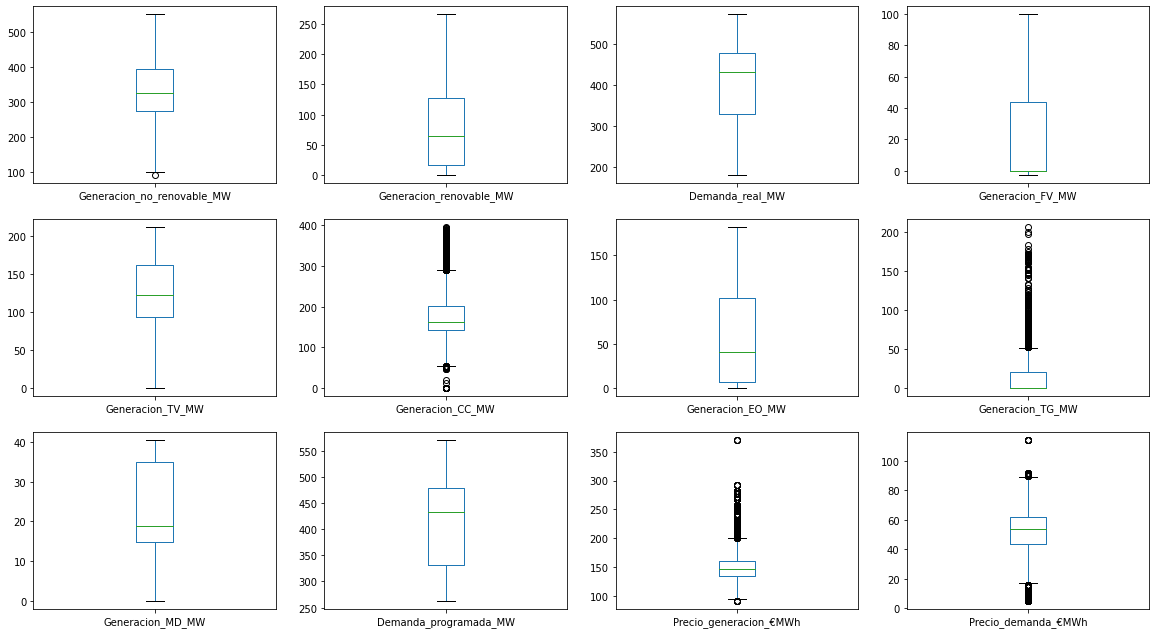

In [61]:
### Escribe aquí tu código ###
atributos_boxplot = dataset.plot(kind='box', subplots=True, layout=(4, 4), figsize=(20, 15), sharex=False,
                                 sharey=False, fontsize=10)

Tras eliminar de nuestro dataset las filas donde los valores de "Demanda real suma de generación SNP" eran anómalos, se observa que el atributo "Generación T.Real no renovable SNP" ya no presenta outliers destacables.

POSIBLES IRREGULARIDADES A ANALIZAR:

- ¿Outliers Ciclo combinado y turbina de gas tienen sentido? Creo que si pero hay que confirmarlo
- Analizar Outliers precio de generación y de demanda, decidir si eliminamos valores y cuales eliminamos

In [62]:
outliers2 = groupby_outliers(dataset, "Generacion_CC_MW", 0.2, 0.8)
outliers2.sample(20)

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
time_series,,,,,,,,,,,,
2019-08-23 19:40:00,464.5,30.1,494.6,7.0,27.8,356.8,23.1,43.6,36.3,495.5,163.90,51.66
2019-10-02 20:10:00,537.1,30.8,567.9,0.0,98.2,348.0,30.8,72.2,18.7,570.9,171.94,60.37
2019-08-09 20:40:00,470.0,18.8,488.8,0.0,19.7,391.2,18.8,23.7,35.4,490.6,158.08,55.46
2019-08-09 21:40:00,492.2,13.8,506.0,0.0,32.4,389.1,13.8,35.0,35.7,507.9,158.15,57.54
2019-08-06 20:30:00,424.6,68.3,492.9,1.9,19.6,358.4,66.4,12.4,34.2,486.0,155.42,60.46
2019-12-03 08:50:00,457.2,11.0,468.2,9.6,89.6,339.9,1.4,9.9,17.8,458.2,155.67,58.88
2019-08-07 20:20:00,434.7,50.4,485.1,1.2,32.7,362.2,49.2,8.9,30.9,485.8,159.81,60.64
2019-08-07 21:30:00,472.1,42.8,514.9,0.0,32.6,378.5,42.8,29.9,31.1,502.6,152.27,62.43
2019-10-02 19:50:00,511.4,31.3,542.7,0.0,98.6,339.5,31.3,55.0,18.3,528.8,167.10,57.10


Los outliers del atributo 'Generación T.Real ciclo combinado SNP' suelen coincidir con picos de demanda donde hay media o poca aportación de las energías renovables, un escenario que puede darse en ocasiones y que es interesante que el modelo de aprendizaje analice y tenga en cuenta para la predicción de escenarios futuros.

Se consideran de utilidad por lo que no se eliminan.

In [63]:
outliers3 = groupby_outliers(dataset, "Generacion_TG_MW", 0.2, 0.8)
outliers3.sample(20)
 

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
time_series,,,,,,,,,,,,
2019-07-04 22:00:00,448.7,31.3,480.0,0.0,158.4,190.6,31.3,64.7,35.0,450.9,160.97,61.34
2019-09-23 11:50:00,385.3,123.8,509.1,27.1,144.7,155.2,96.7,66.5,18.9,509.9,143.89,60.36
2019-04-02 16:20:00,420.8,22.2,443.0,20.9,153.3,155.5,1.3,78.8,33.2,451.1,169.66,66.05
2019-08-23 14:10:00,428.4,107.8,536.2,80.9,30.8,291.5,26.9,70.5,35.6,525.2,150.01,55.13
2019-06-26 09:50:00,471.4,20.7,492.1,19.4,209.7,152.6,1.3,72.1,37.0,481.1,174.38,57.39
2019-09-29 21:40:00,331.8,5.9,337.7,0.0,26.2,131.1,5.9,141.7,32.8,470.6,276.97,59.31
2019-07-10 19:00:00,410.4,46.5,456.9,12.4,166.3,0.0,34.1,206.5,37.6,470.3,230.59,62.31
2019-03-07 21:20:00,498.2,4.7,502.9,0.0,184.1,194.5,4.7,84.4,35.2,489.6,166.66,66.99
2019-09-30 10:40:00,457.8,53.1,510.9,31.8,118.5,253.8,21.3,67.2,18.3,505.9,157.44,61.77


Los outliers del atributo 'Generación T.Real turbina de gas SNP' suelen coincidir con picos de demanda donde hay media o poca aportación de las energías renovables, un escenario que puede darse en ocasiones y que es interesante que el modelo de aprendizaje analice y tenga en cuenta para la predicción de escenarios futuros.

Se consideran de utilidad por lo que no se eliminan.

In [64]:
outliers4 = groupby_outliers(dataset, "Precio_generacion_€MWh")
outliers4.sample(20)

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
time_series,,,,,,,,,,,,
2019-03-18 05:40:00,205.5,96.0,301.5,0.0,117.9,87.6,96.0,0.0,0.0,289.8,254.58,39.83
2019-11-27 05:30:00,284.9,13.7,298.6,0.0,85.8,167.4,13.7,0.0,31.7,301.5,205.89,34.85
2019-12-10 05:20:00,206.9,83.3,290.2,0.0,123.1,83.8,83.3,0.0,0.0,298.3,254.41,37.69
2019-11-06 08:40:00,328.1,130.6,458.7,16.0,103.0,191.9,114.6,15.1,18.1,460.6,202.68,48.40
2019-04-04 05:20:00,279.0,10.1,289.1,0.0,90.5,155.7,10.1,0.0,32.8,292.4,219.07,44.57
2019-09-29 20:50:00,288.1,1.7,289.8,0.0,0.0,124.1,1.7,132.3,31.7,481.2,206.77,60.04
2019-07-30 08:30:00,425.6,10.4,436.0,4.8,147.3,159.8,5.6,83.6,34.9,436.2,221.95,53.33
2019-08-06 05:50:00,250.1,74.2,324.3,0.0,17.9,202.1,74.2,0.0,30.1,321.9,253.84,41.85
2019-09-29 19:40:00,210.6,0.0,210.6,0.0,0.0,12.7,0.0,164.5,33.4,437.4,370.48,54.87


In [65]:
outliers4.describe()

,Generacion_no_renovable_MW,Generacion_renovable_MW,Demanda_real_MW,Generacion_FV_MW,Generacion_TV_MW,Generacion_CC_MW,Generacion_EO_MW,Generacion_TG_MW,Generacion_MD_MW,Demanda_programada_MW,Precio_generacion_€MWh,Precio_demanda_€MWh
count,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000,390.000000
mean,286.992821,63.862308,350.855128,6.632564,114.181538,134.713590,57.229744,21.991538,16.106154,359.956923,234.071949,45.172051
std,80.149110,57.792594,67.956760,16.493269,49.328347,52.221704,53.553264,43.624907,14.974534,69.454695,32.819563,10.724333
min,153.000000,0.000000,179.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,273.000000,92.190000,5.370000
25%,219.575000,9.550000,299.500000,0.000000,84.825000,86.650000,5.825000,0.000000,0.000000,301.500000,214.530000,39.510000
50%,276.550000,45.250000,323.050000,0.000000,108.400000,137.700000,42.050000,0.000000,15.650000,334.800000,228.080000,43.860000
75%,345.800000,110.225000,406.700000,0.100000,160.975000,172.350000,103.500000,25.125000,32.450000,419.800000,254.410000,53.010000
max,449.100000,207.300000,523.000000,83.900000,197.200000,282.400000,167.900000,206.500000,37.700000,524.100000,370.480000,65.570000


Tras analizar los outliers de los precios medios de generación, no se ve o intuye ninguna relación directa con otro atributo del dataset. Aparentemente parece que este disparo en los precios es debido a un conjunto de factores que es dificil de detectar, por lo que se consideran escenarios de interés para el modelo y no se eliminarán.

**4. Matriz de correlación** 

Calcula y visualiza la matriz de correlación
* **¿Qué variable no tiene ninguna correlación con ningún atributo?** 

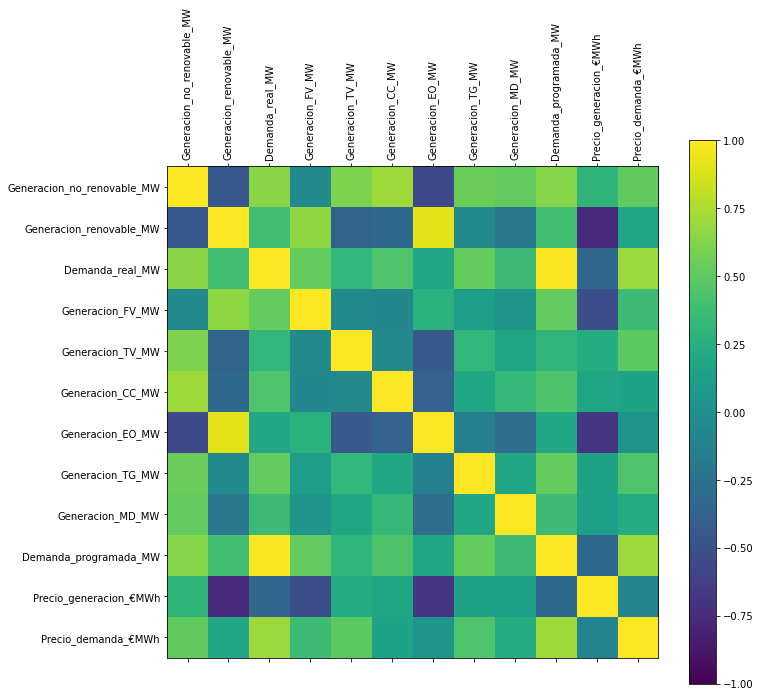

In [66]:
# Cálculo de coeficientes de correlación
corr_matrix = dataset.corr(method='pearson') 


# Matriz de correlación (Descomentar cuando se ejecute)

fig = plt.figure(figsize=(11, 10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr_matrix, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, 12, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)
plt.show()

In [69]:
# Guardamos el archivo en formato CSV y Pickle
import pickle

def save_obj(obj, name ):
       with open('obj/'+ name + '.pkl', 'wb') as f:
           pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

save_obj(dataset, 'df_Tenerife_Electricity_full_2019_clean')
save_obj(leyenda, 'dict_descripcion_df_Electricity')


dataset.to_csv('df_Tenerife_Electricity_full_2019_clean.csv', index=True)
